<a href="https://colab.research.google.com/github/MubasshirNaib/Fruit-and-Vegetable-detection/blob/main/testingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model1.h5')


##Visualization and Performing Prediction on single Image

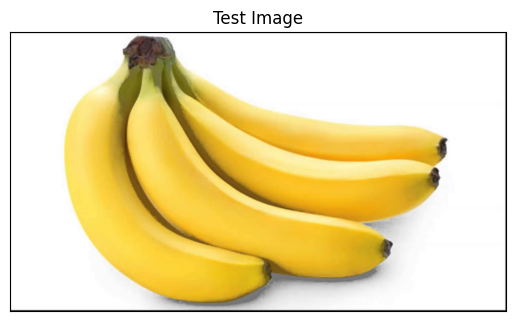

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Dataset/test/banana/Image_5.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

##Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 320ms/step


In [ ]:
print(predictions)

[[1.5845470e-02 5.5202514e-01 2.3745405e-03 9.1399008e-04 2.0422462e-02
  1.1223095e-03 4.3607343e-02 2.5542149e-02 1.1270309e-03 2.0793542e-02
  5.3375987e-03 2.8380187e-04 1.7331980e-02 6.8855826e-03 3.9573433e-03
  8.9108903e-04 9.9017257e-03 2.9090047e-02 2.6633746e-03 8.5825035e-03
  7.4551580e-03 2.1008009e-02 2.3612399e-03 2.6558543e-02 7.4191554e-03
  3.7553336e-02 2.1748061e-04 1.3944898e-02 2.5478771e-03 4.9380384e-02
  1.5955737e-03 4.8178569e-03 2.2245243e-03 1.9270997e-03 3.9834794e-02
  1.2455020e-02]]


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index=np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

1


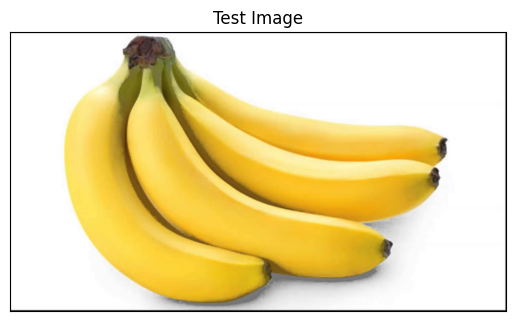

In [ ]:
#Display Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single Prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a banana
